# Quiz 02 - Kendall Gilbert

## Evaluating Groundwater and Spreading Grounds in Los Angeles County

You are provided local groundwater basins clipped to the Los Angeles county area (```data/Ground_Water_Basins_Feature_Layer.geojson```) in addition to local water conservation facilities for spreading and retaining stormwater for eventual percoloation to the groundwater basins (```data/Spreading_Grounds_Feature_Layer.geojson```).

You will complete an analysis to understand some basic statistics around the area and percoluation rates of the spreading grounds grouped by the groundwater basin they are located in.

In [1]:
#Import Packages
import os
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
from shapely.geometry import box,Point, LineString, Polygon
import geopandas as gpd

1. Load both datasets. Examine and adjust the datasets if needed prior to further analysis. 

In [9]:
#load both data sets
Spreading_Grounds_Feature_Layer = gpd.read_file("data/Spreading_Grounds_Feature_Layer.geojson")
Ground_Water_Basins_Feature_Layer = gpd.read_file("data/Ground_Water_Basins_Feature_Layer.geojson")

In [14]:
#Check the crs and spatial extent of the data
if Spreading_Grounds_Feature_Layer.crs == Ground_Water_Basins_Feature_Layer.crs:
    print("The crs are the same for both data sets")
else:
    print("The crs are:",Spreading_Grounds_Feature_Layer.crs,",",Ground_Water_Basins_Feature_Layer.crs)

print("The bounds are:",Spreading_Grounds_Feature_Layer.total_bounds,",",Ground_Water_Basins_Feature_Layer.total_bounds)

The crs are: epsg:3857 , epsg:4326
The bounds are: [-13186215.1134805    4004520.93321453 -13107186.37028249
   4069206.21482731] , [-118.66677039   33.70221573 -117.67838861   34.33339062]


In [12]:
#Reproject the spreading grounds feature layer to the decimal degrees epsg and check crs and spatial extent again
Spreading_Grounds_Feature_Layer_Reprojected = Spreading_Grounds_Feature_Layer.to_crs(epsg=4326)

if Spreading_Grounds_Feature_Layer_Reprojected.crs == Ground_Water_Basins_Feature_Layer.crs:
    print("The crs are the same for both data sets")
else:
    print("The crs are:",Spreading_Grounds_Feature_Layer_Reprojected.crs,",",Ground_Water_Basins_Feature_Layer.crs)

print("The bounds are:",Spreading_Grounds_Feature_Layer_Reprojected.total_bounds,",",Ground_Water_Basins_Feature_Layer.total_bounds)

The crs are the same for both data sets
The bounds are: [-118.45378576   33.81897738 -117.74385848   34.30037129] , [-118.66677039   33.70221573 -117.67838861   34.33339062]


In [16]:
#Check what the dataset looks like
Spreading_Grounds_Feature_Layer_Reprojected.head()

,index,OBJECTID,ID,NAME,OWNER_OPER,BASIN_TYPE,NO__OF_BAS,SEASON_FIR,GROSS_AREA,WETTED_ARE,...,INTAKES,STORAGE,PERCOLATIO,CONTROLLED,UNCONTROLL,EQNUM,MXCREATIONSTATE,SHAPEAREA,SHAPELEN,geometry
0,0,1,EE,PACOIMA S.G.,LOS ANGELES COUNTY - DPW,SHALLOW,12,1932-33,169 ACRES,107.0 ACRES,...,600 CFS,440,65,"PACOIMA DAM, LOPEZ FLOOD CONTROL BASIN","EAST CANYON, PACOIMA WASH, IMPORTED WATER",None,1,6.984530e+06,17051.193678,"MULTIPOLYGON (((-118.45152 34.25178, -118.4513..."
1,1,2,C,SAN GABRIEL COASTAL BASIN S.G.,LOS ANGELES COUNTY - DPW,SHALLOW,3,1938-39,128 ACRES,96.0 ACRES,...,350 CFS,550,75,"SAN GABRIEL CANYON DAMS, SANTA FE & WHITTIER N...",,None,1,5.841535e+06,17754.592698,"POLYGON ((-118.08531 33.97695, -118.08369 33.9..."
2,2,3,BB,HANSEN S.G.,LOS ANGELES COUNTY - DPW,SHALLOW,20,1944-45,156 ACRES,105.0 ACRES,...,400 CFS,279,150,"HANSEN DAM, BIG TUJUNGA DAM",,None,1,7.613001e+06,24768.852743,"MULTIPOLYGON (((-118.39805 34.25192, -118.3983..."
3,3,4,DD,LOPEZ S.G.,LOS ANGELES COUNTY - DPW,SHALLOW,6,1956-57,18 ACRES,12.0 ACRES,...,25 CFS,24,15,"PACOIMA DAM, LOPEZ FLOOD CONTROL BASIN",,None,1,7.364379e+05,6923.087170,"MULTIPOLYGON (((-118.41587 34.29718, -118.4158..."
4,5,6,O,EATON S.B.,LOS ANGELES COUNTY - DPW,DEEP,1,1956-57,16 ACRES,10 ACRES,...,400 CFS,284,10,EATON WASH DAM,"DAM, SPREADING BASIN",None,1,7.896322e+05,4109.163553,"POLYGON ((-118.08238 34.12431, -118.08236 34.1..."


In [17]:
#Check what the dataset looks like
Ground_Water_Basins_Feature_Layer.head()

,OBJECTID,BASIN,SYMBOL,NUMBER_,DPWGround_Water_BasinAREA,SHAPEAREA,SHAPELEN,geometry
0,1,CLAREMONT HEIGHTS BASIN,503,3,None,1.820642e+08,68093.776262,"POLYGON ((-117.72965 34.12684, -117.72560 34.1..."
1,2,MAIN SAN GABRIEL BASIN,503,11,None,3.330093e+09,302136.812440,"POLYGON ((-118.02303 34.15348, -118.02824 34.1..."
2,3,EAGLE ROCK BASIN,500,4,None,6.876071e+07,64869.356747,"POLYGON ((-118.21472 34.14372, -118.21567 34.1..."
3,4,SAN DIMAS BASIN,500,15,None,2.689777e+08,92842.197534,"POLYGON ((-117.74214 34.12342, -117.74459 34.1..."
4,5,SPADRA BASIN,500,18,None,2.275229e+08,89937.726659,"POLYGON ((-117.72294 34.08818, -117.72481 34.0..."


2. Take the ```Spreading_Grounds_Feature_Layer``` and generate two new dataframes: 
- One dataframe dissolving by the groundwater basin number (```NO__OF_BAS```) finding the total storage (```STORAGE```,in units acre-feet) area of spreading grounds per basin.
- One dataframe dissolving by the groundwater basin number (```NO__OF_BAS```) finding the mean percolation rate(```PERCOLATIO```, in units cubic feet per second (CFS)) of spreading grounds per basin.

In [25]:
#Create the two new dataframes dissolving and aggregating by the features specified above, reset the index of the new dataframes so the column of no of basins can be accessed
Spreading_Grounds_Feature_Layer_Reprojected_Total_Storage = Spreading_Grounds_Feature_Layer_Reprojected[['NO__OF_BAS','geometry','STORAGE']].dissolve(by='NO__OF_BAS',aggfunc='sum').reset_index()
Spreading_Grounds_Feature_Layer_Reprojected_Mean_Percolation = Spreading_Grounds_Feature_Layer_Reprojected[['NO__OF_BAS','geometry','PERCOLATIO']].dissolve(by='NO__OF_BAS',aggfunc='mean').reset_index()

In [26]:
#Print the first few lines of the first new dataframe
Spreading_Grounds_Feature_Layer_Reprojected_Total_Storage.head()

,NO__OF_BAS,geometry,STORAGE
0,1,"MULTIPOLYGON (((-117.87466 34.07516, -117.8746...",4115
1,2,"MULTIPOLYGON (((-118.20666 33.82022, -118.2066...",9786
2,3,"POLYGON ((-118.08531 33.97695, -118.08369 33.9...",550
3,4,"MULTIPOLYGON (((-117.83765 34.11948, -117.8376...",100
4,5,"MULTIPOLYGON (((-117.74684 34.11953, -117.7468...",12


In [27]:
#Print the first few lines of the second new dataframe
Spreading_Grounds_Feature_Layer_Reprojected_Mean_Percolation.head()

,NO__OF_BAS,geometry,PERCOLATIO
0,1,"MULTIPOLYGON (((-117.87466 34.07516, -117.8746...",9.4
1,2,"MULTIPOLYGON (((-118.20666 33.82022, -118.2066...",33.8
2,3,"POLYGON ((-118.08531 33.97695, -118.08369 33.9...",75.0
3,4,"MULTIPOLYGON (((-117.83765 34.11948, -117.8376...",8.5
4,5,"MULTIPOLYGON (((-117.74684 34.11953, -117.7468...",13.0


3. Create two maps that display both dissolved dataframes. Also overlay the groundwater basins on each map (for example adding: ```groundwater_dataframe.plot(alpha=1,facecolor="none",edgecolor="black",zorder=10,ax=ax)```). Write a meaningful caption describing any spatial patterns.

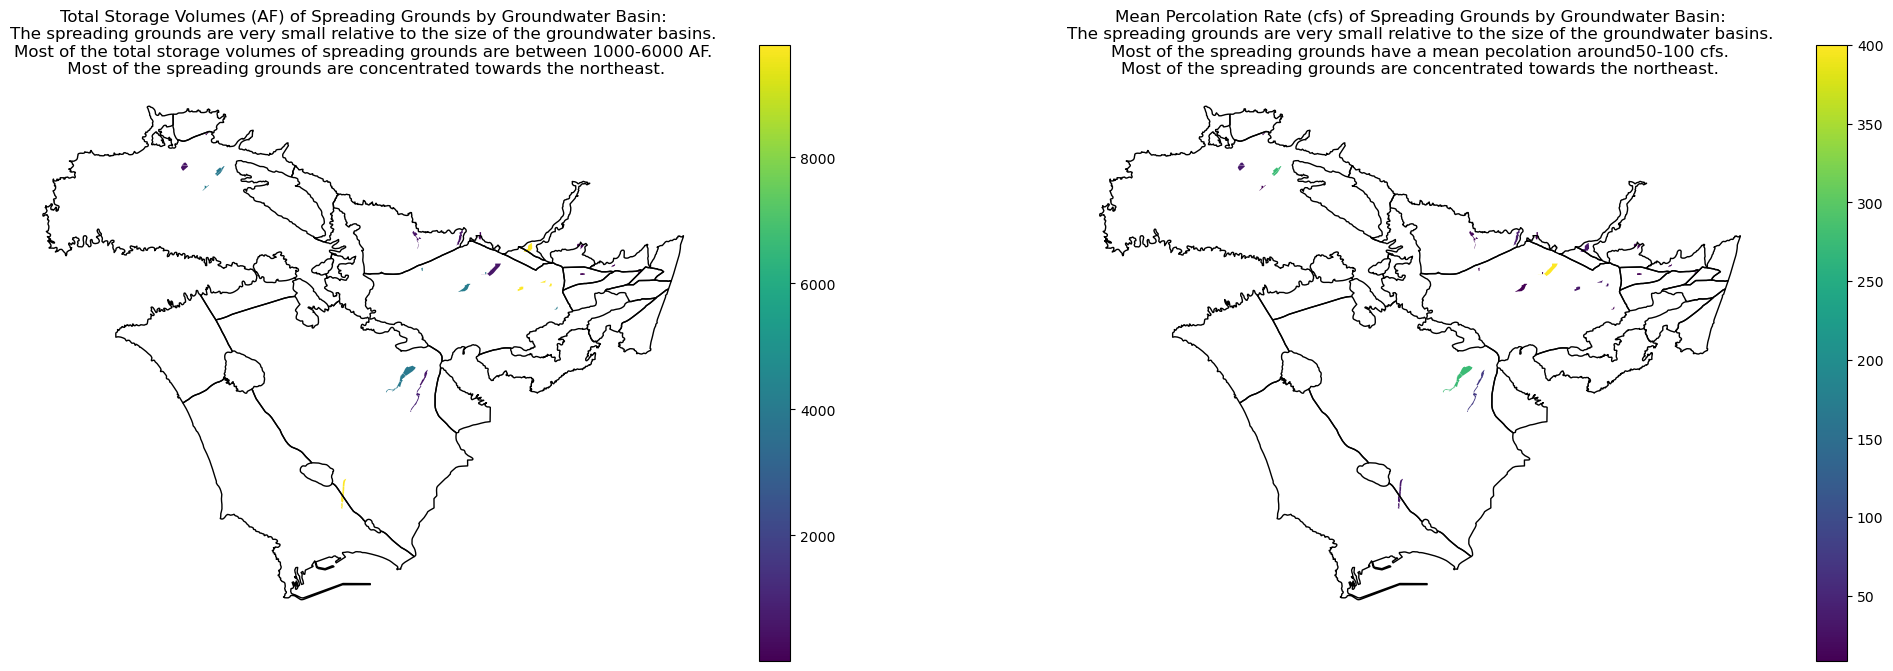

In [70]:
#Create a figure with two maps
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,8))

#Map the total storage and groundwater basins on first map
Spreading_Grounds_Feature_Layer_Reprojected_Total_Storage.plot(column='STORAGE', legend=True, ax=ax1)
Ground_Water_Basins_Feature_Layer.plot(alpha=1,facecolor="none",edgecolor="black",zorder=10,ax=ax1)

#Map the mean percolation and groundwater basins on second map
Spreading_Grounds_Feature_Layer_Reprojected_Mean_Percolation.plot(column='PERCOLATIO', legend=True, ax=ax2)
Ground_Water_Basins_Feature_Layer.plot(alpha=1,facecolor="none",edgecolor="black",zorder=10,ax=ax2)

#Create meaningful title/caption
ax1.set_title("Total Storage Volumes (AF) of Spreading Grounds by Groundwater Basin:\nThe spreading grounds are very small relative to the size of the groundwater basins.\nMost of the total storage volumes of spreading grounds are between 1000-6000 AF.\n Most of the spreading grounds are concentrated towards the northeast.")
ax2.set_title("Mean Percolation Rate (cfs) of Spreading Grounds by Groundwater Basin:\nThe spreading grounds are very small relative to the size of the groundwater basins.\nMost of the spreading grounds have a mean pecolation around50-100 cfs.\nMost of the spreading grounds are concentrated towards the northeast.")

ax1.set_axis_off()
ax2.set_axis_off()

plt.show()

4.  The ```Ground_Water_Basins_Feature_Layer```  has the groundwater basin name as a column called ```BASIN```. Create a single dataframe which contains the following columns from your analysis in step (2): basin name, basin number, total storage volume in AF, mean percolation rate in CFS. Note there are at least two ways to complete this last step. One way is using a spatial join, then selecting the columns of interest. The other way, requires just using dataframe merging logic to merge the dataframes knowing that the groundwater basin number is already present in both geodataframes, and selecting the columns of interest. I suggest using the first.

In [71]:
#Join the dataframes created in part 2 and select colunms
Joined_Dissolved_Dataframe = gpd.sjoin(Spreading_Grounds_Feature_Layer_Reprojected_Total_Storage,Spreading_Grounds_Feature_Layer_Reprojected_Mean_Percolation,how='inner',op='intersects')
Joined_Dissolved_Dataframe = Joined_Dissolved_Dataframe[['NO__OF_BAS_left','geometry','STORAGE','PERCOLATIO']]
Joined_Dissolved_Dataframe.head()

/opt/tljh/user/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,NO__OF_BAS_left,geometry,STORAGE,PERCOLATIO
0,1,"MULTIPOLYGON (((-117.87466 34.07516, -117.8746...",4115,9.4
1,2,"MULTIPOLYGON (((-118.20666 33.82022, -118.2066...",9786,33.8
2,3,"POLYGON ((-118.08531 33.97695, -118.08369 33.9...",550,75.0
3,4,"MULTIPOLYGON (((-117.83765 34.11948, -117.8376...",100,8.5
4,5,"MULTIPOLYGON (((-117.74684 34.11953, -117.7468...",12,13.0


In [72]:
#Dissolve the groundwater basins feature layer by the basin
Ground_Water_Basins_Feature_Layer_To_Join = Ground_Water_Basins_Feature_Layer[['BASIN','geometry']].dissolve(by='BASIN').reset_index()
Ground_Water_Basins_Feature_Layer_To_Join.head()

,BASIN,geometry
0,CENTRAL BASIN,"POLYGON ((-118.39690 34.05544, -118.39274 34.0..."
1,CHINO BASIN,"POLYGON ((-117.70139 34.09971, -117.70480 34.0..."
2,CLAREMONT HEIGHTS BASIN,"POLYGON ((-117.72965 34.12684, -117.72560 34.1..."
3,EAGLE ROCK BASIN,"POLYGON ((-118.21472 34.14372, -118.21567 34.1..."
4,FOOTHILL BASIN,"POLYGON ((-117.77707 34.14309, -117.77846 34.1..."


In [79]:
#Join the joined dataframe and groundwater basins feature layer
Complete_Joined_Dissolved_Dataframe = gpd.sjoin(Joined_Dissolved_Dataframe,Ground_Water_Basins_Feature_Layer_To_Join,how='inner',op='intersects')
Complete_Joined_Dissolved_Dataframe.head()

/opt/tljh/user/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,NO__OF_BAS_left,geometry,STORAGE,PERCOLATIO,index_right,BASIN
0,1,"MULTIPOLYGON (((-117.87466 34.07516, -117.8746...",4115,9.4,15,SAN FERNANDO BASIN
5,6,"MULTIPOLYGON (((-118.41162 34.30018, -118.4115...",24,15.0,15,SAN FERNANDO BASIN
8,12,"MULTIPOLYGON (((-118.01942 34.17175, -118.0197...",465,35.0,15,SAN FERNANDO BASIN
12,20,"MULTIPOLYGON (((-118.13741 33.96795, -118.1373...",3973,275.0,15,SAN FERNANDO BASIN
0,1,"MULTIPOLYGON (((-117.87466 34.07516, -117.8746...",4115,9.4,10,MAIN SAN GABRIEL BASIN


In [76]:
#select the columns of the final joined dataframe
Complete_Joined_Dissolved_Dataframe = Complete_Joined_Dissolved_Dataframe[['NO__OF_BAS_left','STORAGE','PERCOLATIO','BASIN']]
Complete_Joined_Dissolved_Dataframe

,NO__OF_BAS_left,STORAGE,PERCOLATIO,BASIN
0,1,4115,9.4,SAN FERNANDO BASIN
5,6,24,15.0,SAN FERNANDO BASIN
8,12,465,35.0,SAN FERNANDO BASIN
12,20,3973,275.0,SAN FERNANDO BASIN
0,1,4115,9.4,MAIN SAN GABRIEL BASIN
1,2,9786,33.8,MAIN SAN GABRIEL BASIN
11,16,540,400.0,MAIN SAN GABRIEL BASIN
1,2,9786,33.8,WEST COAST BASIN
1,2,9786,33.8,CENTRAL BASIN
2,3,550,75.0,CENTRAL BASIN
